### Etivity 2

#### Name: Brian Parle
#### ID: 18200036

**Task 1 (CS5062)**
Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

**Task 2 (CS5062)**
Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

**Task 3 (CS5062)**
Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

**Task 4 (CE6002)**
Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

**Task 5 (CE6002)**
Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

### Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
%matplotlib inline



In [66]:
#import the data, setting the most appropriate datatype
df = pd.read_csv("./bank_et2.csv")
df.describe(include='all')
df.dtypes

Unnamed: 0        int64
age             float64
job              object
marital          object
education        object
default          object
balance           int64
ratio_bal_ln    float64
ratio_ln_inc    float64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
subscribed       object
dtype: object

### Task1. Missing Values

In [67]:
# Find the number of nulls/NaNs in the dataset

df.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [68]:
#explore dataset
df.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,2000.000000,1988.000000,1990,2000,1896,2000,2000.000000,2000.000000,2000.000000,2000,2000,1809,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1546,2000
unique,NaN,NaN,11,3,3,2,NaN,NaN,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,management,married,secondary,no,NaN,NaN,NaN,no,no,cellular,NaN,feb,NaN,NaN,NaN,NaN,failure,no
freq,NaN,NaN,461,1111,995,1985,NaN,NaN,NaN,1037,1750,1663,NaN,404,NaN,NaN,NaN,NaN,955,1000
mean,999.500000,41.753018,NaN,NaN,NaN,NaN,1413.663500,0.241951,0.485030,NaN,NaN,NaN,13.851500,NaN,292.020500,1.909500,167.896000,2.561500,NaN,NaN
std,577.494589,12.724358,NaN,NaN,NaN,NaN,3131.224213,0.821604,1.075543,NaN,NaN,NaN,9.712189,NaN,221.557295,1.378862,131.754126,3.400735,NaN,NaN
min,0.000000,18.000000,NaN,NaN,NaN,NaN,-980.000000,-2.632068,-2.851405,NaN,NaN,NaN,1.000000,NaN,7.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,499.750000,32.000000,NaN,NaN,NaN,NaN,201.500000,-0.308018,-0.274181,NaN,NaN,NaN,5.000000,NaN,146.000000,1.000000,75.750000,1.000000,NaN,NaN
50%,999.500000,38.000000,NaN,NaN,NaN,NaN,551.000000,0.224099,0.487082,NaN,NaN,NaN,12.000000,NaN,236.000000,1.000000,182.000000,2.000000,NaN,NaN
75%,1499.250000,50.000000,NaN,NaN,NaN,NaN,1644.500000,0.806315,1.211896,NaN,NaN,NaN,23.000000,NaN,379.000000,2.000000,251.000000,3.000000,NaN,NaN


We can see from the data summary that we have missing/null values in:
- age (12)
- job (10)
- education (104)
- contact (191)
- poutcome (454)

#### Task 1. Missing Values: age

In [69]:
#look at missing age
df.loc[df['age'].isnull()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


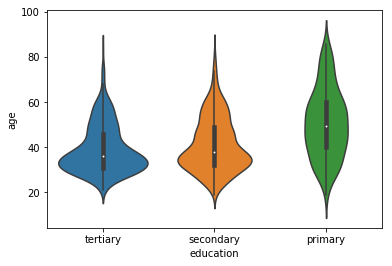

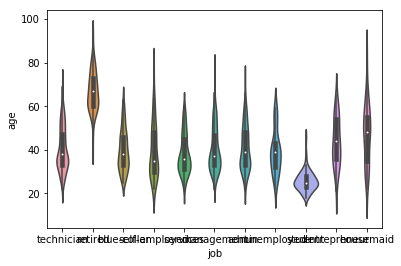

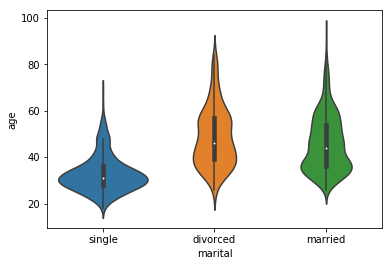

In [70]:
#it would be reasonable to set the age to the median value for the combination of [job, marital, education]
#let's first look at how they are distributed
sns.violinplot(x='education', y='age', data=df)
plt.show()
sns.violinplot(x='job', y='age', data=df)
plt.show()
sns.violinplot(x='marital', y='age', data=df)
plt.show()

In [71]:
#there isn't good separation using those values so we can fill the missing ages with the computed
#average grouped by those features
#using the approach from the Lab2 notebook

#create a table with median values for our groups
df_averages = df.pivot_table(values='age', 
                       index=['job', 'education'], 
                       columns='marital', 
                       aggfunc=np.median)
df_averages.fillna(0, inplace=True)
print(df_averages)
df_averages.describe(include='all')
# Define function to return an element of the pivot table
def get_element(x):
    return df_averages.loc[[x['job'], x['education'], x['marital']]].astype(float)

marital                  divorced  married  single
job           education                           
admin.        primary        46.0     50.5    37.0
              secondary      40.0     43.0    34.0
              tertiary       37.0     33.5    33.0
blue-collar   primary        42.0     44.0    33.0
              secondary      42.0     39.0    31.5
              tertiary        0.0     27.0    29.0
entrepreneur  primary        56.0     55.0    32.0
              secondary       0.0     45.5    38.0
              tertiary       43.0     44.0    33.0
housemaid     primary        54.5     56.0    48.0
              secondary      67.0     49.0    30.0
              tertiary        0.0     47.0    29.5
management    primary         0.0     53.0     0.0
              secondary      37.0     42.0    32.0
              tertiary       44.5     39.5    32.0
retired       primary        71.0     67.0     0.0
              secondary      61.0     64.0    56.0
              tertiary       60

In [72]:
# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

df['age'].describe()

count     2000.0
unique      80.0
top         33.0
freq        95.0
Name: age, dtype: float64

In [73]:
df.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,2000.000000,2000.0,1990,2000,1896,2000,2000.000000,2000.000000,2000.000000,2000,2000,1809,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1546,2000
unique,NaN,80.0,11,3,3,2,NaN,NaN,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,33.0,management,married,secondary,no,NaN,NaN,NaN,no,no,cellular,NaN,feb,NaN,NaN,NaN,NaN,failure,no
freq,NaN,95.0,461,1111,995,1985,NaN,NaN,NaN,1037,1750,1663,NaN,404,NaN,NaN,NaN,NaN,955,1000
mean,999.500000,NaN,NaN,NaN,NaN,NaN,1413.663500,0.241951,0.485030,NaN,NaN,NaN,13.851500,NaN,292.020500,1.909500,167.896000,2.561500,NaN,NaN
std,577.494589,NaN,NaN,NaN,NaN,NaN,3131.224213,0.821604,1.075543,NaN,NaN,NaN,9.712189,NaN,221.557295,1.378862,131.754126,3.400735,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,-980.000000,-2.632068,-2.851405,NaN,NaN,NaN,1.000000,NaN,7.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,499.750000,NaN,NaN,NaN,NaN,NaN,201.500000,-0.308018,-0.274181,NaN,NaN,NaN,5.000000,NaN,146.000000,1.000000,75.750000,1.000000,NaN,NaN
50%,999.500000,NaN,NaN,NaN,NaN,NaN,551.000000,0.224099,0.487082,NaN,NaN,NaN,12.000000,NaN,236.000000,1.000000,182.000000,2.000000,NaN,NaN
75%,1499.250000,NaN,NaN,NaN,NaN,NaN,1644.500000,0.806315,1.211896,NaN,NaN,NaN,23.000000,NaN,379.000000,2.000000,251.000000,3.000000,NaN,NaN


In [74]:
df.dtypes

Unnamed: 0        int64
age              object
job              object
marital          object
education        object
default          object
balance           int64
ratio_bal_ln    float64
ratio_ln_inc    float64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
subscribed       object
dtype: object

#### Task 1. Missing Values: job

In [75]:
#let's look at the missing job entries
df.loc[df['job'].isnull()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,255,42,NaN,single,primary,no,2398,-1.418888,1.809977,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,257,46,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
831,831,41,NaN,single,primary,no,2398,-0.243804,-0.685437,yes,no,NaN,8,may,287,2,-1,0,NaN,no
1223,1223,55,NaN,married,secondary,no,2206,-1.134511,0.861389,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,1281,50,NaN,married,NaN,no,558,-0.455001,1.595412,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,1669,54,NaN,married,secondary,no,2206,-0.575645,-0.242814,no,no,cellular,13,may,260,1,91,4,success,yes
1711,1711,77,NaN,married,NaN,no,397,-0.871514,0.134782,no,no,telephone,7,may,300,3,-1,0,NaN,yes
1801,1801,28,NaN,single,NaN,no,326,0.298961,1.653248,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,1868,48,NaN,single,NaN,no,1819,0.680564,-0.786048,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,1975,45,NaN,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


In [76]:
#it's not clear yet how we will iuse the job data, so for now we can set these to 'Unknown'
df['job'].fillna('Unknown', inplace=True)
df['job'].describe()

count           2000
unique            12
top       management
freq             461
Name: job, dtype: object

#### Task 1. Missing Values: education

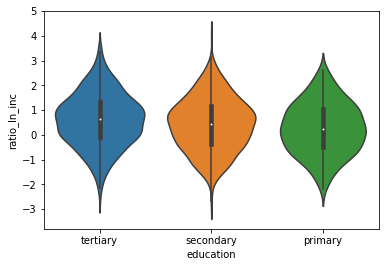

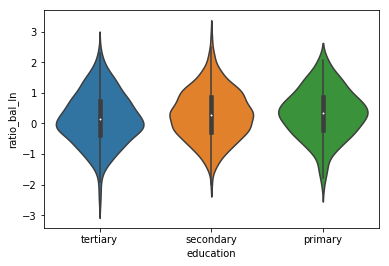

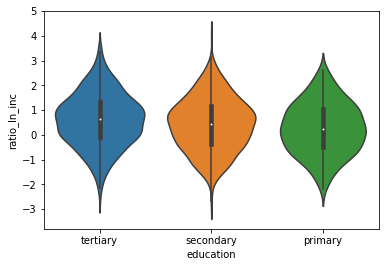

In [77]:
#let's look at how education relates to other features
sns.violinplot(x='education', y='ratio_ln_inc', data=df)
plt.show()
sns.violinplot(x='education', y='ratio_bal_ln', data=df)
plt.show()
sns.violinplot(x='education', y='ratio_ln_inc', data=df)
plt.show()

In [78]:
#there is no obvious way to correlate the education values to another feature(s), so I will 
#randomly assign a value based on the current distribution
#many thanks to Eamon O'Gairbhith for the inspiration

df_counts = df['education'].value_counts(normalize=True)
print(df_counts)

secondary    0.524789
tertiary     0.360759
primary      0.114451
Name: education, dtype: float64


In [79]:
fill_series = pd.Series(np.random.choice(['secondary', 'tertiary', 'primary'], 
                                                      p=[0.52479,0.36076,0.11445], size=len(df)))
df['education'] = df['education'].fillna(fill_series)
df['education'].describe()

count          2000
unique            3
top       secondary
freq           1052
Name: education, dtype: object

#### Task 1. Missing Values: contact

In [80]:
df['contact'].describe()

count         1809
unique           2
top       cellular
freq          1663
Name: contact, dtype: object

In [81]:
#pcontact has 2 possible values and 92% are 'cellular'. 9.5% of values are missing
#use the same technique as above to use a proportional distribution to assign new values
df_counts = df['contact'].value_counts(normalize=True)
print(df_counts)

cellular     0.919292
telephone    0.080708
Name: contact, dtype: float64


In [82]:
fill_series = pd.Series(np.random.choice(['cellular', 'telephone'], 
                                                      p=[0.919,0.081], size=len(df)))
df['contact'] = df['contact'].fillna(fill_series)
df['contact'].describe()

count         2000
unique           2
top       cellular
freq          1841
Name: contact, dtype: object

#### Task 1. Missing Values: poutcome

failure    955
NaN        454
success    444
other      147
Name: poutcome, dtype: int64


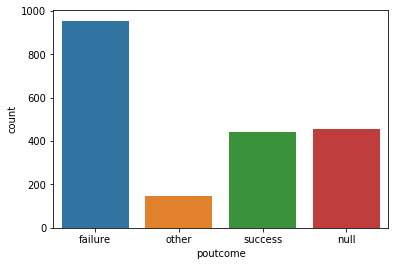

In [83]:
print(df['poutcome'].value_counts(dropna=False))
sns.countplot(x='poutcome', data=df.fillna("null"))

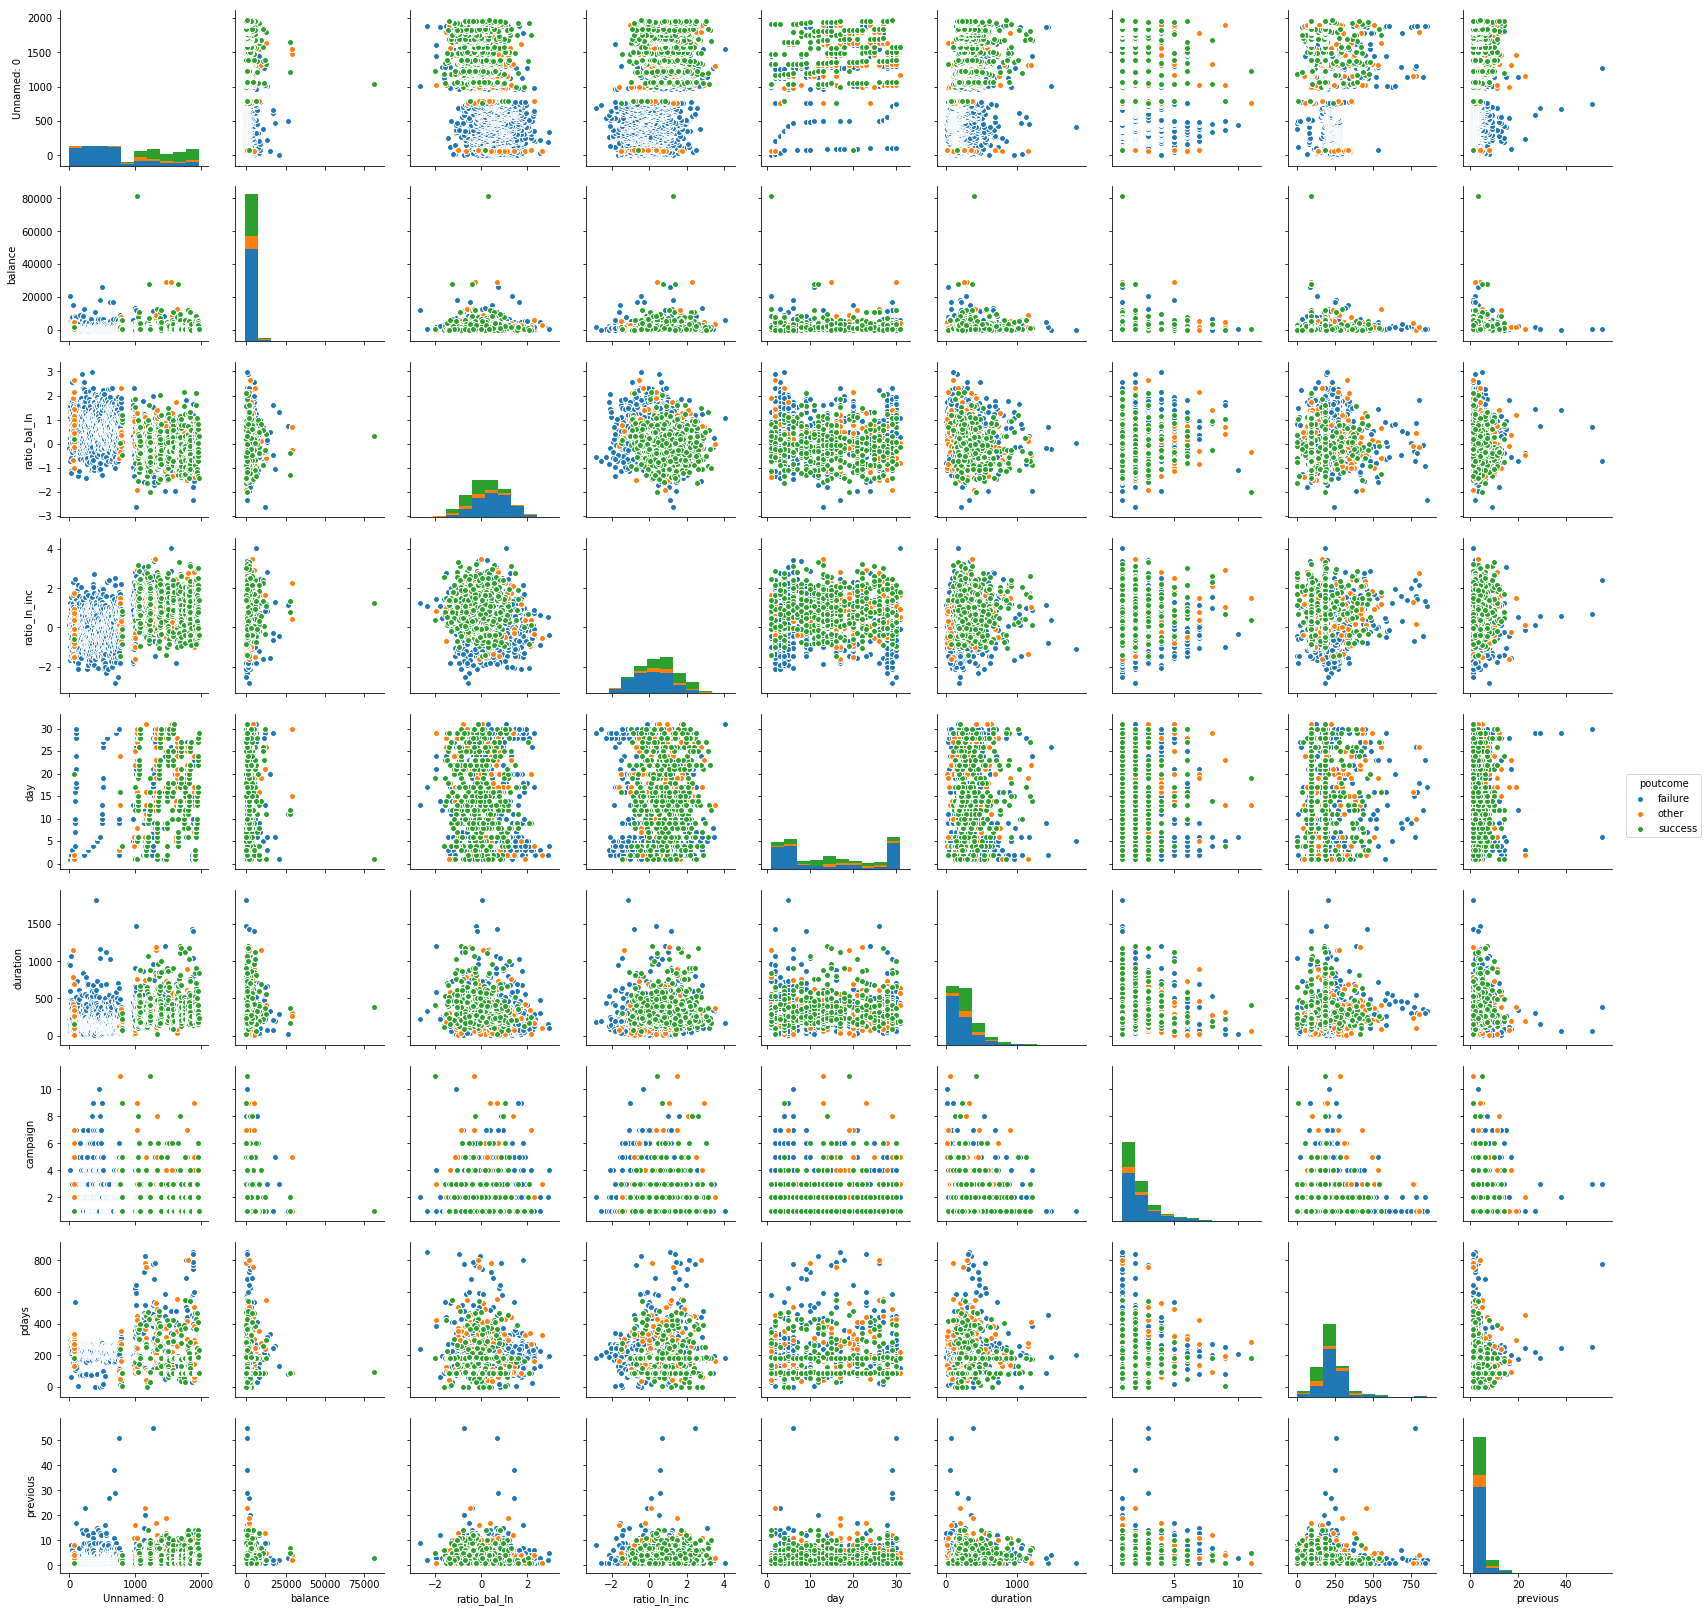

In [84]:
#we can investigate whether the poutcome can be imputed by some other numerical relationship.
#we can do a pairplot of the numerical values and apply a colour based on poutcome

#Need to ignore the Unnamed column and row as that is the index
#Also ignore the diagonal which is each feature plotted against itself

sns.pairplot(df, hue='poutcome')

In [85]:
#nothing specific can be seen in the set of plots above that would be useful.
#assigning one of the known values to the null entries may imbue some meaning that is unintended.
#it is possible a linear regression could be used to determine whether it can be predicted from other values.
#until we know more about poutcome and how it may beinfluenced we can assign it to an 'Unknown' category
df['poutcome'].fillna('Unknown', inplace=True)
df['poutcome'].describe()

count        2000
unique          4
top       failure
freq          955
Name: poutcome, dtype: object

### Task 2. Outliers

#### Task 2. Outliers: balance

/Users/brianparle/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


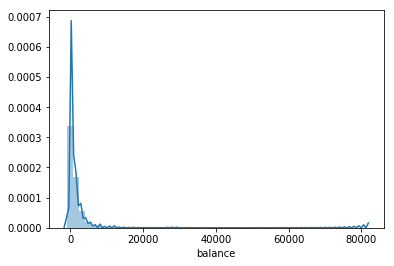

In [86]:
#let's look at some box plots and violin plots of the numerical values
sns.distplot(df['balance'])

count     2000.000000
mean      1413.663500
std       3131.224213
min       -980.000000
25%        201.500000
50%        551.000000
75%       1644.500000
max      81204.000000
Name: balance, dtype: float64

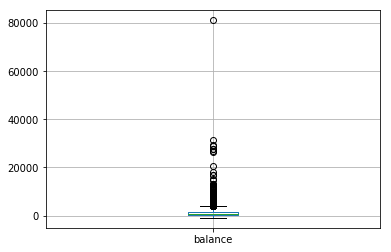

In [87]:
#there are a small number of large values, we'll use a boxplot to investigate further
df.boxplot(column='balance')
df['balance'].describe(include='All')

In [88]:
#there are several outliers with the largest at 81204, with the mean value at 1413.66
#although the values be not be invalid, they may skew any model we want to develop. 
#therefore we will remove these samples.

# Find outliers using tukey algorithm and then remove
def find_outliers(data_vector):
    """
    Tukey Algorithm based on April Chen's talk: https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb
    ...and Michel Danjou's implementation
    """
    # Given a vector V of length N, the q-th percentile of V is the value q/100 of the
    # way from the minimum to the maximum in a sorted copy of V.
    q1 = np.percentile(data_vector, 25)
    q3 = np.percentile(data_vector, 75)
    iqr = q3-q1 
    print("q1:{}, q3:{}, iqr:{}".format(q1, q3, iqr))

    # Create boundaries outside which we will find the outliers
    bottom_boundary = q1 - 1.5*iqr
    bottom_outlier_indices = list(data_vector.index[(data_vector < bottom_boundary)])
    bottom_outlier_values = list(data_vector[bottom_outlier_indices])

    top_boundary = q3 + 1.5*iqr
    top_outlier_indices = list(data_vector.index[(data_vector > top_boundary)])
    top_outlier_values = list(data_vector[top_outlier_indices])

    return bottom_outlier_indices, bottom_outlier_values, top_outlier_indices, top_outlier_values

#Extract the outliers for 'balance'
bottom_outlier_indices, bottom_outlier_values, top_outlier_indices, top_outlier_values = \
find_outliers(df['balance'])
print("bottom_outlier_indices:{}".format(bottom_outlier_indices))
print("bottom_outlier_values :{}".format(bottom_outlier_values))
print("top_outlier_indices   :{}".format(top_outlier_indices))
print("top_outlier_values    :{}".format(top_outlier_values))

q1:201.5, q3:1644.5, iqr:1443.0
bottom_outlier_indices:[]
bottom_outlier_values :[]
top_outlier_indices   :[9, 12, 19, 34, 40, 59, 70, 71, 79, 82, 104, 166, 196, 211, 220, 227, 236, 286, 301, 323, 333, 389, 414, 431, 441, 459, 468, 498, 510, 528, 614, 620, 659, 661, 665, 716, 735, 770, 775, 778, 780, 785, 787, 789, 794, 812, 822, 846, 971, 1002, 1004, 1010, 1020, 1025, 1030, 1033, 1050, 1057, 1064, 1066, 1071, 1072, 1074, 1076, 1082, 1084, 1086, 1088, 1106, 1117, 1162, 1163, 1176, 1184, 1212, 1215, 1255, 1263, 1271, 1273, 1277, 1286, 1302, 1310, 1316, 1321, 1328, 1331, 1355, 1373, 1374, 1380, 1384, 1385, 1389, 1390, 1412, 1415, 1422, 1427, 1431, 1440, 1444, 1471, 1478, 1482, 1512, 1524, 1535, 1544, 1550, 1551, 1553, 1567, 1576, 1581, 1587, 1597, 1601, 1604, 1634, 1637, 1642, 1657, 1666, 1668, 1676, 1683, 1685, 1687, 1736, 1741, 1744, 1756, 1762, 1781, 1788, 1790, 1802, 1806, 1826, 1834, 1872, 1874, 1883, 1906, 1911, 1913, 1916, 1919, 1926, 1953, 1957, 1959, 1987, 1988, 1998, 1999]
top_

In [89]:
df.drop(top_outlier_indices)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,5,46,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,6,34,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,7,45,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,8,58,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
10,10,38,management,single,tertiary,no,715,1.079459,-1.642914,yes,no,cellular,2,apr,951,1,132,3,failure,no


#### Task 2. Outliers: ratio_bal_ln

/Users/brianparle/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


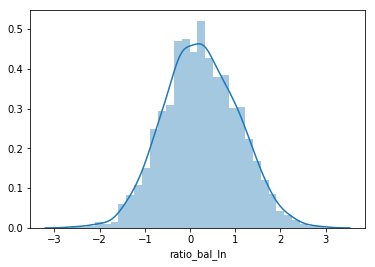

In [90]:
sns.distplot(df['ratio_bal_ln'])

The distribution fits the normal distribution and there is no sign of outliers.

#### Task 2. Outliers: ratio_ln_inc

/Users/brianparle/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


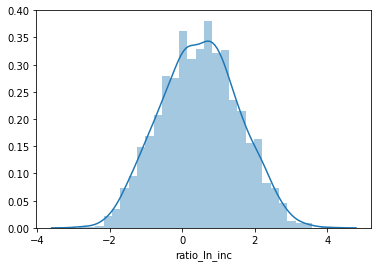

In [91]:
sns.distplot(df['ratio_ln_inc'])

The distribution also fits the normal distribution and there is no sign of outliers.

### Task 3. Add a new feature

In [93]:
#There are a few options here:
#- convert a categorical feature to numeric using somegthing like pandas.get_dummies
#- convert a numerical field to a categorical feature e.g. age -> age_brackets
#- combine numerical gfeatures to produce a new numerical feature e.g. ratio_ln_inc * ratio_bal_ln = ratio_bal_inc

In [95]:
#combine ratio_ln_inc * ratio_bal_ln = ratio_bal_inc
df['ratio_bal_inc'] = df['ratio_ln_inc'] * df['ratio_bal_ln']

/Users/brianparle/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


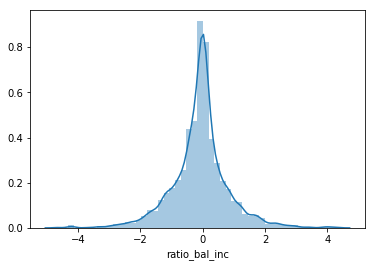

In [97]:
sns.distplot(df['ratio_bal_inc'])

#### Task 3. Add a new feature: get_dummies